## R code to make BCD-output violin plot with, as input signal ISTS 65 dB

6 April 2022 GC, 

In [1]:
library('data.table')
library(stringr)
library("ggplot2")

In [2]:
#' Read data from a CSV file and rename columns
#'
#' This function reads data from a CSV file at the specified path and renames the
#' columns by removing non-numeric characters. It returns the updated data frame.
#'
#' @param path_in The path to the input CSV file
#' @return The data frame with renamed columns

read_output <- function(path_in) {

  # read data from csv
  dt <- read.csv(path_in)
  
  # rename columns
  clm = colnames(dt)
  clm <- clm[-1]
  newco <- c('Study_ID', str_extract(clm, '\\d+'))
  colnames(dt) <- newco
  
  # return the data frame
  return(dt)
}


In [3]:
#' Create a violin plot with boxplot
#'
#' This function creates a violin plot using data from the 'data_frame' data frame.
#' The violins are colored in red.
#'
#' @param data_frame The data frame containing the data for the plot
#' @param color_scheme A vector of colors for frequency bands (default: use red)
#' @return The violin plot
#' @export

create_violin_plot <- function(data_frame) {
  
  # Make plots wider 
  options(repr.plot.width=12, repr.plot.height=9)
    
  # chose colors
  ColorBlind2  <- c("#E69F00", "#56B4E9")

  # Create the violin plot
  p <- ggplot(data_frame, aes(x = Frequency_band, y = Output)) +
    geom_violin(width=1.8, fill=ColorBlind2[1])+
    geom_boxplot(width=.25, outlier.colour="#56B4E9") 
  p <- p + theme_linedraw() 
    
  # Add title and axis labels
  p <- p + ggtitle("") +
    xlab("CF 1/3 octave band [Hz]") +
    ylab("Output BCD on skull simulator [dB ref 1 μN]")

  return(p)
}


In [4]:
# input directory
din <- '/media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/' 

# input file
fin = 'output_BCD_55dB.csv'

# input file path
pin <- paste(din, fin, sep = "")

In [5]:
bcd_output <- read_output(pin)
bcd_output

Study_ID,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,45.3,47.7,52.8,65.1,71.1,69.7,65.6,69.6,72.7,69.2,66.4,65.8,61.0,58.2,57.3,49.2
35,44.8,48.1,55.9,70.5,77.7,77.8,73.6,73.8,77.0,74.5,65.8,61.2,61.4,63.0,63.1,54.4
43,45.5,48.7,56.2,70.9,78.3,78.6,75.1,75.2,75.4,70.4,64.8,64.7,63.4,61.7,59.4,50.4
47,45.4,47.9,54.1,68.3,75.6,76.0,72.8,73.0,71.9,63.6,57.4,59.9,61.0,59.5,56.9,48.1
50,44.4,47.6,57.2,70.2,77.0,77.1,73.6,74.5,74.0,67.0,61.3,62.8,63.6,63.9,63.0,53.8
53,46.1,49.1,57.8,73.3,80.7,80.6,75.8,73.4,70.9,62.8,58.7,60.3,60.6,60.2,59.1,50.2
54,46.5,50.1,59.6,74.4,81.6,81.5,77.1,75.6,73.9,67.1,63.5,63.8,61.6,60.0,58.7,50.2
56,47.6,51.1,59.5,74.1,81.2,81.3,77.7,78.8,78.8,72.3,67.8,69.1,68.2,66.2,63.6,54.5
59,46.4,49.9,59.9,74.1,80.9,80.6,76.0,73.2,70.2,63.5,57.9,60.2,61.8,59.8,55.7,46.6


In [6]:
output_long <- melt(setDT(bcd_output), id.vars = c('Study_ID'), 
                 value.name = 'Output', variable.name = 'Frequency_band')

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


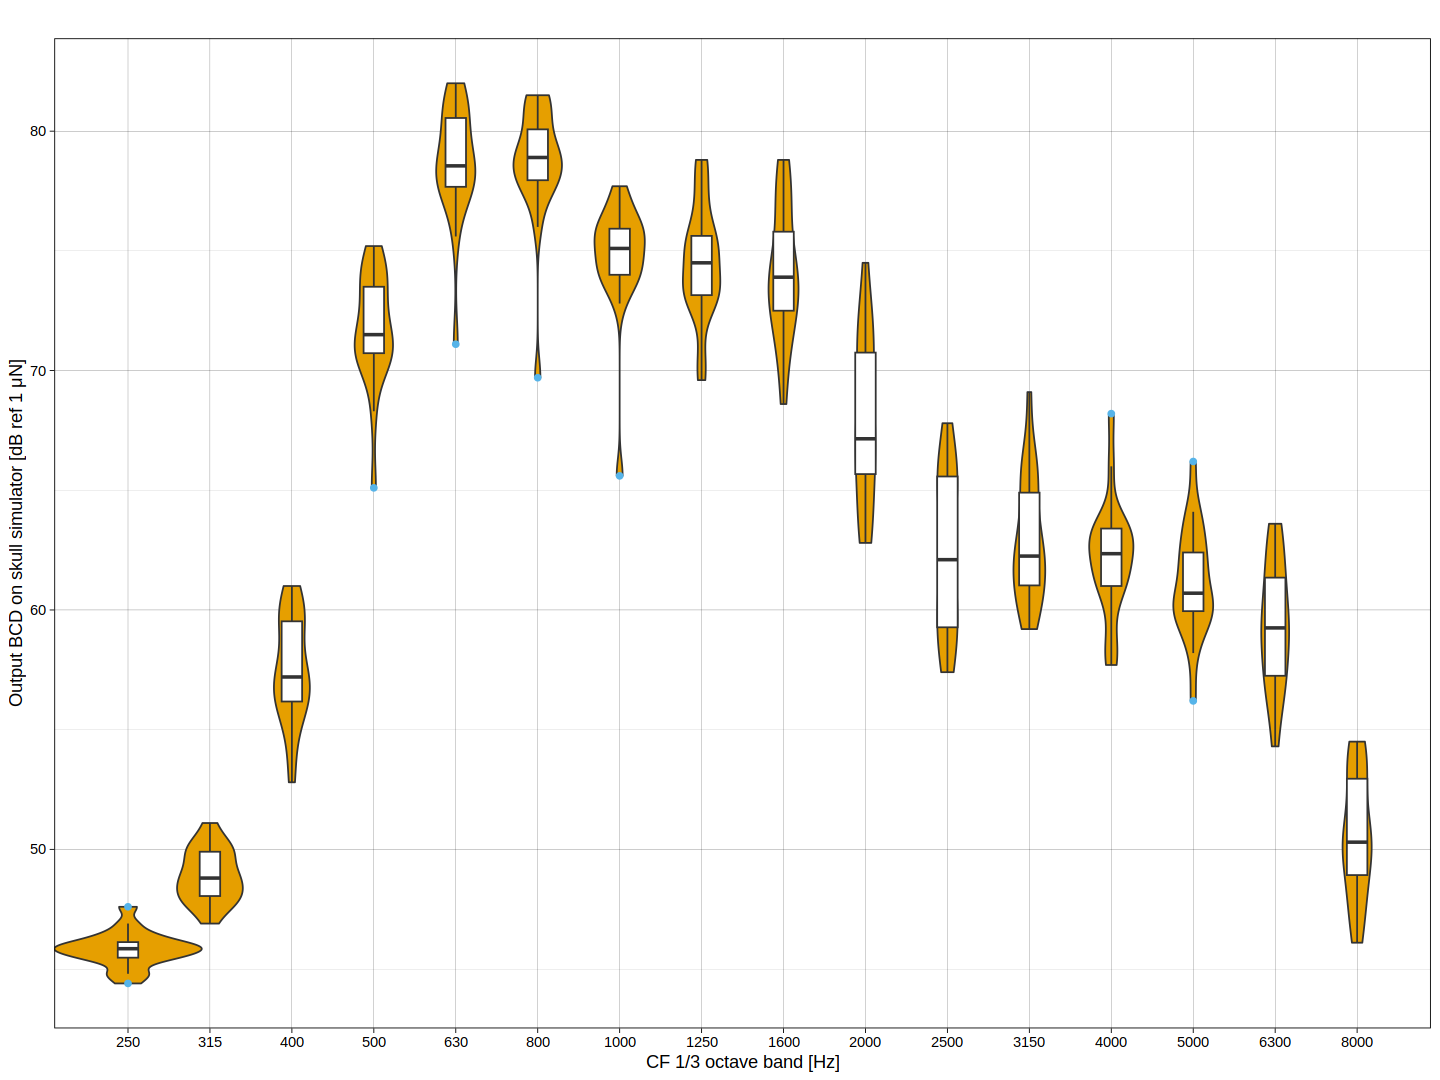

In [7]:
plot <- create_violin_plot(output_long)
plot

In [ ]:


tiff("/media/guido/LACIE/Cingle_Guido/Master/Implant/Figures_R/output_violin_55.tiff", units="in", width=9, height=6, res=300)
plot
dev.off()

Warning message:
“`position_dodge()` requires non-overlapping x intervals”
